# Задача 1. Минимизация гладкой функции

In [11]:
from scipy.optimize import minimize
import numpy as np
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

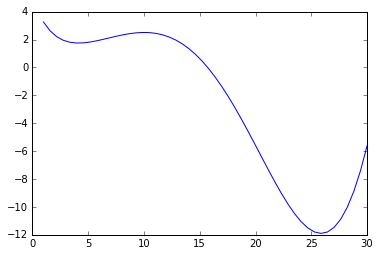

In [180]:
grid = np.linspace(1.0, 30.0, num=50)
plt.plot(grid, f(grid))

Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.

http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

### Unconstrained minimization

**Method Nelder-Mead** uses the Simplex algorithm [R150], [R151]. This algorithm is robust in many applications. However, if numerical computation of derivative can be trusted, other algorithms using the first and/or second derivatives information might be preferred for their better performance in general.

**Method Powell** is a modification of Powell’s method [R152], [R153] which is a conjugate direction method. It performs sequential one-dimensional minimizations along each vector of the directions set (direc field in options and info), which is updated at each iteration of the main minimization loop. The function need not be differentiable, and no derivatives are taken.

**Method CG** uses a nonlinear conjugate gradient algorithm by Polak and Ribiere, a variant of the Fletcher-Reeves method described in [R154] pp. 120-122. Only the first derivatives are used.

**Method BFGS** uses the quasi-Newton method of Broyden, Fletcher, Goldfarb, and Shanno (BFGS) [R154] pp. 136. It uses the first derivatives only. BFGS has proven good performance even for non-smooth optimizations. This method also returns an approximation of the Hessian inverse, stored as hess_inv in the OptimizeResult object.

**Method Newton-CG** uses a Newton-CG algorithm [R154] pp. 168 (also known as the truncated Newton method). It uses a CG method to the compute the search direction. See also TNC method for a box-constrained minimization with a similar algorithm.

**Method dogleg** uses the dog-leg trust-region algorithm [R154] for unconstrained minimization. This algorithm requires the gradient and Hessian; furthermore the Hessian is required to be positive definite.

**Method trust-ncg** uses the Newton conjugate gradient trust-region algorithm [R154] for unconstrained minimization. This algorithm requires the gradient and either the Hessian or a function that computes the product of the Hessian with a given vector.

### Constrained minimization

**Method L-BFGS-B** uses the L-BFGS-B algorithm [R155], [R156] for bound constrained minimization.

**Method TNC** uses a truncated Newton algorithm [R154], [R157] to minimize a function with variables subject to bounds. This algorithm uses gradient information; it is also called Newton Conjugate-Gradient. It differs from the Newton-CG method described above as it wraps a C implementation and allows each variable to be given upper and lower bounds.

**Method COBYLA** uses the Constrained Optimization BY Linear Approximation (COBYLA) method [R158], [10], [11]. The algorithm is based on linear approximations to the objective function and each constraint. The method wraps a FORTRAN implementation of the algorithm. The constraints functions ‘fun’ may return either a single number or an array or list of numbers.

**Method SLSQP** uses Sequential Least SQuares Programming to minimize a function of several variables with any combination of bounds, equality and inequality constraints. The method wraps the SLSQP Optimization subroutine originally implemented by Dieter Kraft [12]. Note that the wrapper handles infinite values in bounds by converting them into large floating values.

In [45]:
minimized_func = [minimize(f, i, method='Nelder-Mead')['x'] for i in grid]    

In [46]:
minimized_func

[array([ 4.13632813]),
 array([ 4.13628827]),
 array([ 4.13629125]),
 array([ 4.13629624]),
 array([ 4.13626285]),
 array([ 4.13626435]),
 array([ 4.13630645]),
 array([ 4.13625837]),
 array([ 4.13630197]),
 array([ 4.13626285]),
 array([ 4.13632563]),
 array([ 4.13629624]),
 array([ 4.13627382]),
 array([ 4.1362778]),
 array([ 4.1362915]),
 array([ 25.88022062]),
 array([ 25.88016806]),
 array([ 25.88018674]),
 array([ 25.88019434]),
 array([ 25.88020169]),
 array([ 25.88015461]),
 array([ 25.88016183]),
 array([ 25.88016395]),
 array([ 25.88019073]),
 array([ 25.88016058]),
 array([ 25.88018151]),
 array([ 25.8801802]),
 array([ 25.8801977]),
 array([ 25.88021327]),
 array([ 25.88021415]),
 array([ 25.88018637]),
 array([ 25.88019123]),
 array([ 25.88018743]),
 array([ 25.88017503]),
 array([ 25.88022131]),
 array([ 25.88021066]),
 array([ 25.88022112]),
 array([ 25.88018637]),
 array([ 25.88020954]),
 array([ 25.8801855]),
 array([ 25.88018637]),
 array([ 25.8802073]),
 array([ 25.8

Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

In [173]:
print minimize(f, 2.0, method='BFGS')['x']

[ 4.13627619]


Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

In [170]:
minimized_func0 = [minimize(f, i, method='BFGS')['x'] for i in grid]
print minimized_func[-1]

[ 25.88021851]


In [171]:
minimized_func0[21]

array([ 308.6235216])

In [172]:
grid[21]

13.428571428571429

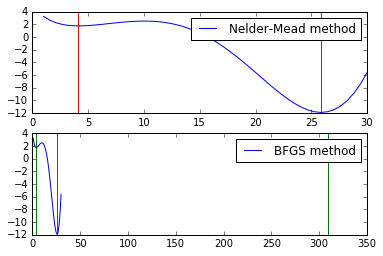

In [81]:
plt.figure(1)
plt.subplot(211)

for i in minimized_func:
    plt.axvline(i, color='r')
plt.plot(grid, f(grid), label='Nelder-Mead method')
plt.legend()

plt.subplot(212)
for i in minimized_func0:
    plt.axvline(i, color='g')
plt.plot(grid, f(grid), label='BFGS method')
plt.legend()

# Задача 2: глобальная оптимизация

In [82]:
from scipy.optimize import differential_evolution

In [100]:
dif_min = differential_evolution(f, [(1.0, 30.0)], seed=42)

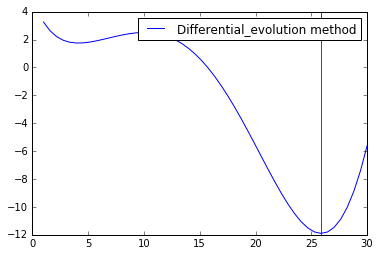

In [101]:
plt.axvline(dif_min.x, color='r')
plt.plot(grid, f(grid), label='Differential_evolution method')
plt.legend()

Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [102]:
print dif_min
print '-------------------'
print minimize(f, 2.0, method='BFGS')

     fun: array([-11.89889467])
     jac: array([  5.32907052e-07])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 5
 success: True
       x: array([ 25.88019358])
-------------------
      fun: 1.745268290344928
 hess_inv: array([[ 5.98750711]])
      jac: array([ -2.05636024e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 4.13627619])


# Задача 3. Минимизация негладкой функции

In [157]:
# def h(x):
#     return np.array(map(int, f(x)))

In [158]:
def h(x):
    return np.int_(f(x))

Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

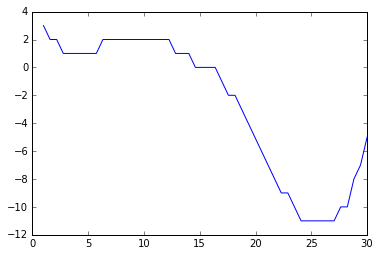

In [150]:
plt.plot(grid, h(grid))

Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

In [151]:
minimize(h, 30.0, method='BFGS')['x'][-1]

30.0

In [152]:
[minimize(h, i, method='BFGS')['x'] for i in grid][-1]

array([ 30.])

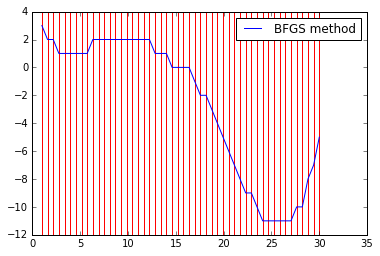

In [153]:
for i in [minimize(h, i, method='BFGS')['x'] for i in grid]:
    plt.axvline(i, color='r')
plt.plot(grid, h(grid), label='BFGS method')
plt.legend()

Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

[ 25.80938911]


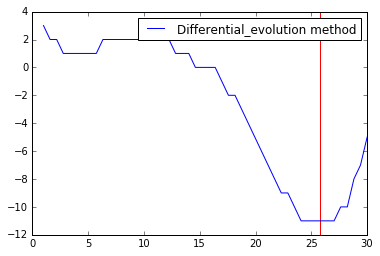

In [175]:
dif_min_un = differential_evolution(h, [(1.0, 30.0)], seed=42)
print dif_min_un.x
plt.axvline(dif_min_un.x, color='r')
plt.plot(grid, h(grid), label='Differential_evolution method')
plt.legend()

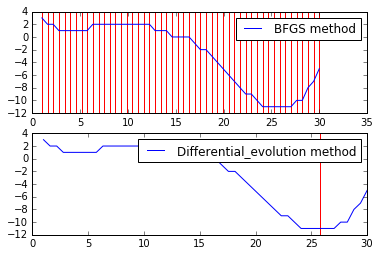

In [155]:
plt.figure(1)
plt.subplot(211)

for i in [minimize(h, i, method='BFGS')['x'] for i in grid]:
    plt.axvline(i, color='r')
plt.plot(grid, h(grid), label='BFGS method')
plt.legend()

plt.subplot(212)
plt.axvline(dif_min_un.x, color='r')
plt.plot(grid, h(grid), label='Differential_evolution method')
plt.legend()

Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.